In [55]:
# Finding trends in the most-listened songs globally on Spotify over the past 5 years
# Every Thursday, Spotify releases a Weekly Chart of the Top 200 most-listened songs
# For this project, we will look at the global chart
# Historical charts are available at https://charts.spotify.com/charts/view/regional-global-weekly/latest and downloadable as CSV files
# For this project, we have downloaded the weekly charts for the past 5 years for every 4 weeks since 2018-05-24 (roughly 5 years ago)
# These CSV files will be uploaded to GitHub under the data folder
# Then the audio features of these songs are obtained
# Then we can see if there has been a trend in audio features of the most popular songs over time (eg. have songs become more acoustic?)

## Part 1: Getting the value of the audio features of the top 50 songs of the week, per 4 weeks, for 5 years

In [2]:
# first I need to import the necessary packages and define a function

import requests
import pandas as pd
import plotnine as p9
from datetime import date, timedelta

AUTH_URL = 'https://accounts.spotify.com/api/token'

# remember to delete credentials when uploading to GitHub!!
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': 'xxx',
    'client_secret': 'xxx',
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [3]:
# first we need to get the dates of the charts we want to analyse
# we want to look at the charts every 4 weeks ie. 28 days
delta = timedelta(days=28)

# we want to look at the charts for the past 5 years (starting 2018-05-24 until this week)
start_spotify_dt = date(2018, 5, 24)
end_spotify_dt = date(2023, 5, 25)

# getting a list of all the chart dates
chart_dates = []
while start_spotify_dt <= end_spotify_dt:
    chart_dates.append(start_spotify_dt.isoformat())
    start_spotify_dt += delta


In [4]:
# writing the code step-by-step first
# as an example, we will use the first week's chart (2018-05-24)

# first we want to open the CSV file as a pandas dataframe
chart_1 = pd.read_csv("/data/spotify_charts/regional-global-weekly-" + chart_dates[0] + ".csv")
chart_1

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams
0,1,spotify:track:7dt6x5M1jzdTEt8oCbisTK,Post Malone,Better Now,Republic Records,1,2,4,30755342
1,2,spotify:track:7ef4DlsgrMEH11cDZd32M6,"Calvin Harris, Dua Lipa",One Kiss (with Dua Lipa),Sony Music UK,2,3,7,27907952
2,3,spotify:track:0b9oOr2ZgvyQu88wzixux9,Childish Gambino,This Is America,Wolf+Rothstein/RCA Records,1,1,3,27688906
3,4,spotify:track:1cTZMwcBJT0Ka3UJPXOeeN,Drake,Nice For What,Cash Money/Drake LP6,1,4,7,26932041
4,5,spotify:track:2XW4DbS6NddZxRPm5rMCeY,Drake,God's Plan,Cash Money/Drake LP6,1,6,18,23808225
...,...,...,...,...,...,...,...,...,...
195,196,spotify:track:7EI6Iki24tBHAMxtb4xQN2,Rita Ora,Anywhere,Rita Sahatciu Ora,39,189,31,3976696
196,197,spotify:track:7AQim7LbvFVZJE3O8TYgf2,"XXXTENTACION, Trippie Redd",Fuck Love (feat. Trippie Redd),Bad Vibes Forever / EMPIRE,41,184,39,3970794
197,198,spotify:track:3ZhTT6yjZwpPph5MIJ53XY,"Lil Skies, Landon Cube",Red Roses (feat. Landon Cube),All We Got Ent.,133,-1,13,3970058
198,199,spotify:track:0KKkJNfGyhkQ5aFogxQAPU,Bruno Mars,That's What I Like,Atlantic Records,6,198,73,3946959


In [5]:
# then we simply use the Spotify API to get the audio features of these songs as a dataframe
# with one API call we can get the audio features of multiple songs
# to use the API, we need to provide the track ids of the top 50 songs in the chart

uris = chart_1['uri'].values.tolist()
track_ids_all = [uri.replace('spotify:track:','') for uri in uris]
track_ids_list = track_ids_all[:50]

# using the Spotify API

Authorization = 'Bearer ' + access_token

track_ids = ','.join(track_ids_list)
audio_features_url = 'https://api.spotify.com/v1/audio-features?ids=' + track_ids
response = requests.get(audio_features_url, headers={'ids': track_ids, 'Authorization': Authorization})

# putting all the data into a dataframe
audio_features_df = pd.DataFrame(data = response.json()['audio_features'])

# we also want to add the date of the chart to the dataframe (in this case, it is 2018-05-24)
dates = [chart_dates[0]] * 50
audio_features_df['date'] = dates
audio_features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,date
0,0.680,0.578,10,-5.804,1,0.0400,0.33100,0.000000,0.1350,0.3410,145.038,audio_features,7dt6x5M1jzdTEt8oCbisTK,spotify:track:7dt6x5M1jzdTEt8oCbisTK,https://api.spotify.com/v1/tracks/7dt6x5M1jzdT...,https://api.spotify.com/v1/audio-analysis/7dt6...,231267,4,2018-05-24
1,0.791,0.862,9,-3.240,0,0.1100,0.03700,0.000022,0.0814,0.5920,123.994,audio_features,7ef4DlsgrMEH11cDZd32M6,spotify:track:7ef4DlsgrMEH11cDZd32M6,https://api.spotify.com/v1/tracks/7ef4DlsgrMEH...,https://api.spotify.com/v1/audio-analysis/7ef4...,214847,4,2018-05-24
2,0.854,0.463,5,-6.159,1,0.1370,0.11700,0.000000,0.3540,0.5490,120.024,audio_features,0b9oOr2ZgvyQu88wzixux9,spotify:track:0b9oOr2ZgvyQu88wzixux9,https://api.spotify.com/v1/tracks/0b9oOr2ZgvyQ...,https://api.spotify.com/v1/audio-analysis/0b9o...,225773,4,2018-05-24
3,0.567,0.913,8,-6.471,1,0.0736,0.09340,0.000124,0.1140,0.7920,93.350,audio_features,1cTZMwcBJT0Ka3UJPXOeeN,spotify:track:1cTZMwcBJT0Ka3UJPXOeeN,https://api.spotify.com/v1/tracks/1cTZMwcBJT0K...,https://api.spotify.com/v1/audio-analysis/1cTZ...,210926,4,2018-05-24
4,0.758,0.448,7,-9.441,1,0.1030,0.03090,0.000087,0.5580,0.3730,77.176,audio_features,2XW4DbS6NddZxRPm5rMCeY,spotify:track:2XW4DbS6NddZxRPm5rMCeY,https://api.spotify.com/v1/tracks/2XW4DbS6NddZ...,https://api.spotify.com/v1/audio-analysis/2XW4...,198960,4,2018-05-24
5,0.703,0.696,0,-5.482,1,0.0529,0.03750,0.000006,0.2740,0.3660,121.969,audio_features,5SxkdsY1ufZzoq9iXceLw9,spotify:track:5SxkdsY1ufZzoq9iXceLw9,https://api.spotify.com/v1/tracks/5SxkdsY1ufZz...,https://api.spotify.com/v1/audio-analysis/5Sxk...,205947,4,2018-05-24
6,0.750,0.560,8,-8.094,1,0.1050,0.54600,0.000000,0.1110,0.4590,140.060,audio_features,3swc6WTsr7rl9DqQKQA55C,spotify:track:3swc6WTsr7rl9DqQKQA55C,https://api.spotify.com/v1/tracks/3swc6WTsr7rl...,https://api.spotify.com/v1/audio-analysis/3swc...,221440,4,2018-05-24
7,0.595,0.773,9,-4.736,0,0.0549,0.03640,0.001080,0.3340,0.7110,180.073,audio_features,39N9RPD9MRb5WmoLzNzPeA,spotify:track:39N9RPD9MRb5WmoLzNzPeA,https://api.spotify.com/v1/tracks/39N9RPD9MRb5...,https://api.spotify.com/v1/audio-analysis/39N9...,173628,4,2018-05-24
8,0.626,0.880,9,-2.384,0,0.0504,0.20500,0.000000,0.1280,0.5340,95.079,audio_features,08bNPGLD8AhKpnnERrAc6G,spotify:track:08bNPGLD8AhKpnnERrAc6G,https://api.spotify.com/v1/tracks/08bNPGLD8AhK...,https://api.spotify.com/v1/audio-analysis/08bN...,202621,4,2018-05-24
9,0.903,0.675,11,-3.445,0,0.2140,0.54200,0.000013,0.0595,0.4420,96.507,audio_features,3V8UKqhEK5zBkBb6d6ub8i,spotify:track:3V8UKqhEK5zBkBb6d6ub8i,https://api.spotify.com/v1/tracks/3V8UKqhEK5zB...,https://api.spotify.com/v1/audio-analysis/3V8U...,417920,4,2018-05-24


In [6]:
# now we combine all of the above steps and iterate over all the 66 charts from 2018-05-24 to 2023-05-18

Authorization = 'Bearer ' + access_token

# creating lists of dataframes for each audio feature over time
# the dataframes in each list will later be concatenated 
danceability_list = []
energy_list = []
speechiness_list = []
acousticness_list = []
instrumentalness_list = []
loudness_list = []
valence_list = []
tempo_list = []
duration_ms_list = []

# iterating over all the charts
for i in range(len(chart_dates)):
    chart = pd.read_csv("/data/spotify_charts/regional-global-weekly-" + chart_dates[i] + ".csv")
    uris = chart['uri'].values.tolist()
    track_ids_all = [uri.replace('spotify:track:','') for uri in uris]
    track_ids_list = track_ids_all[:50]
    track_ids = ','.join(track_ids_list)
    audio_features_url = 'https://api.spotify.com/v1/audio-features?ids=' + track_ids
    response = requests.get(audio_features_url, headers={'ids': track_ids, 'Authorization': Authorization})
    df = pd.DataFrame(data = response.json()['audio_features'])
    dates = [chart_dates[i]] * 50
    df['date'] = dates
    # extracting the columns of the respective audio features and appending them to a list
    danceability_list.append(df[['danceability', 'date']].copy())
    energy_list.append(df[['energy', 'date']].copy())
    speechiness_list.append(df[['speechiness', 'date']].copy())
    acousticness_list.append(df[['acousticness', 'date']].copy())
    instrumentalness_list.append(df[['instrumentalness', 'date']].copy())
    loudness_list.append(df[['loudness', 'date']].copy())
    valence_list.append(df[['valence', 'date']].copy())
    tempo_list.append(df[['tempo', 'date']].copy())
    duration_ms_list.append(df[['duration_ms', 'date']].copy())

## Part 2: Calculating a weighted average value for each audio feature for each chart

In [7]:
# methodology: 
#   for each of the 50 songs in a chart, we multiply the audio feature value by the number of streams it has
#   we then sum all of these values and divide by the total number of streams for these 50 songs
#   this gives us the weighted average value of the audio features for each chart

weighted_avg_danceability_list = []
weighted_avg_energy_list = []
weighted_avg_speechiness_list = []
weighted_avg_acousticness_list = []
weighted_avg_instrumentalness_list = []
weighted_avg_loudness_list = []
weighted_avg_valence_list = []
weighted_avg_tempo_list = []
weighted_avg_duration_ms_list = []

for i in range(len(chart_dates)):
    chart = pd.read_csv("data/spotify_charts/regional-global-weekly-" + chart_dates[i] + ".csv")
    chart['streams'][:50]
    # danceability
    weighted_danceability_df = pd.DataFrame({'danceability' : danceability_list[i]['danceability'], 'streams' : chart['streams'][:50]})
    weighted_danceability_df['weighted_danceability'] = weighted_danceability_df['danceability'] * weighted_danceability_df['streams'] / weighted_danceability_df['streams'].sum()
    weighted_avg_danceability_list.append(weighted_danceability_df['weighted_danceability'].sum())
    # energy
    weighted_energy_df = pd.DataFrame({'energy' : energy_list[i]['energy'], 'streams' : chart['streams'][:50]})
    weighted_energy_df['weighted_energy'] = weighted_energy_df['energy'] * weighted_energy_df['streams'] / weighted_energy_df['streams'].sum()
    weighted_avg_energy_list.append(weighted_energy_df['weighted_energy'].sum())
    # speechiness
    weighted_speechiness_df = pd.DataFrame({'speechiness' : speechiness_list[i]['speechiness'], 'streams' : chart['streams'][:50]})
    weighted_speechiness_df['weighted_speechiness'] = weighted_speechiness_df['speechiness'] * weighted_speechiness_df['streams'] / weighted_speechiness_df['streams'].sum()
    weighted_avg_speechiness_list.append(weighted_speechiness_df['weighted_speechiness'].sum())
    # acousticness
    weighted_acousticness_df = pd.DataFrame({'acousticness' : acousticness_list[i]['acousticness'], 'streams' : chart['streams'][:50]})
    weighted_acousticness_df['weighted_acousticness'] = weighted_acousticness_df['acousticness'] * weighted_acousticness_df['streams'] / weighted_acousticness_df['streams'].sum()
    weighted_avg_acousticness_list.append(weighted_acousticness_df['weighted_acousticness'].sum())
    # instrumentalness
    weighted_instrumentalness_df = pd.DataFrame({'instrumentalness' : instrumentalness_list[i]['instrumentalness'], 'streams' : chart['streams'][:50]})
    weighted_instrumentalness_df['weighted_instrumentalness'] = weighted_instrumentalness_df['instrumentalness'] * weighted_instrumentalness_df['streams'] / weighted_instrumentalness_df['streams'].sum()
    weighted_avg_instrumentalness_list.append(weighted_instrumentalness_df['weighted_instrumentalness'].sum())
    # loudness
    weighted_loudness_df = pd.DataFrame({'loudness' : loudness_list[i]['loudness'], 'streams' : chart['streams'][:50]})
    weighted_loudness_df['weighted_loudness'] = weighted_loudness_df['loudness'] * weighted_loudness_df['streams'] / weighted_loudness_df['streams'].sum()
    weighted_avg_loudness_list.append(weighted_loudness_df['weighted_loudness'].sum())
    # valence
    weighted_valence_df = pd.DataFrame({'valence' : valence_list[i]['valence'], 'streams' : chart['streams'][:50]})
    weighted_valence_df['weighted_valence'] = weighted_valence_df['valence'] * weighted_valence_df['streams'] / weighted_valence_df['streams'].sum()
    weighted_avg_valence_list.append(weighted_valence_df['weighted_valence'].sum())
    # tempo
    weighted_tempo_df = pd.DataFrame({'tempo' : tempo_list[i]['tempo'], 'streams' : chart['streams'][:50]})
    weighted_tempo_df['weighted_tempo'] = weighted_tempo_df['tempo'] * weighted_tempo_df['streams'] / weighted_tempo_df['streams'].sum()
    weighted_avg_tempo_list.append(weighted_tempo_df['weighted_tempo'].sum())
    # duration_ms
    weighted_duration_ms_df = pd.DataFrame({'duration_ms' : duration_ms_list[i]['duration_ms'], 'streams' : chart['streams'][:50]})
    weighted_duration_ms_df['weighted_duration_ms'] = weighted_duration_ms_df['duration_ms'] * weighted_duration_ms_df['streams'] / weighted_duration_ms_df['streams'].sum()
    weighted_avg_duration_ms_list.append(weighted_duration_ms_df['weighted_duration_ms'].sum())

weighted_audio_features_df = pd.DataFrame({'date' : chart_dates, 
                                           'danceability' : weighted_avg_danceability_list, 
                                           'energy' : weighted_avg_energy_list, 
                                           'speechiness' : weighted_avg_speechiness_list, 
                                           'acousticness' : weighted_avg_acousticness_list, 
                                           'instrumentalness' : weighted_avg_instrumentalness_list, 
                                           'loudness' : weighted_avg_loudness_list,
                                           'valence' : weighted_avg_valence_list, 
                                           'tempo' : weighted_avg_tempo_list,
                                           'duration_ms' : weighted_avg_duration_ms_list})
weighted_audio_features_df

,date,danceability,energy,speechiness,acousticness,instrumentalness,loudness,valence,tempo,duration_ms
0,2018-05-24,0.705398,0.653658,0.109665,0.176248,0.000286,-5.458403,0.465891,116.883750,213161.978862
1,2018-06-21,0.724622,0.619597,0.123573,0.254902,0.002025,-6.188298,0.452323,114.996394,202303.915907
2,2018-07-19,0.728136,0.628063,0.119073,0.210670,0.003063,-6.407209,0.442464,120.263353,211016.298551
3,2018-08-16,0.723606,0.659409,0.132700,0.240020,0.001631,-5.721066,0.453655,115.407760,215076.566869
4,2018-09-13,0.733538,0.670481,0.152747,0.189718,0.000402,-5.683278,0.439076,116.469269,218518.132888
...,...,...,...,...,...,...,...,...,...,...
61,2023-01-26,0.687904,0.646882,0.084526,0.205125,0.025955,-5.937558,0.494072,121.830812,197705.158070
62,2023-02-23,0.683035,0.658735,0.081275,0.210040,0.023799,-6.017461,0.509659,124.991612,190809.499464
63,2023-03-23,0.682949,0.650184,0.095094,0.266614,0.019144,-6.059182,0.517409,123.129609,193366.872609
64,2023-04-20,0.679065,0.650173,0.084835,0.277603,0.010932,-6.010306,0.550451,124.732251,195269.678953


In [9]:
# getting an overall average of the weighted audio features over the past 5 years
weighted_audio_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'loudness', 'valence', 'tempo', 'duration_ms']
overall_averages = weighted_audio_features_df[weighted_audio_features].mean()
overall_averages_df = overall_averages.to_frame().transpose()
overall_averages_df['Artist'] = 'Overall Average'
overall_averages_df

,danceability,energy,speechiness,acousticness,instrumentalness,loudness,valence,tempo,duration_ms,Artist
0,0.698055,0.632035,0.106633,0.246419,0.007178,-6.15962,0.512175,122.341801,199239.058122,Overall Average


## Part 3: Comparing the overall average value of each audio feature with the average value for each artist

In [10]:
# getting the data on average value of audio features for Top 10 artists over the past 5 years
artists_features_df = pd.read_csv("/Users/jacenhutagaol/Desktop/LSE/DS105L/LSE---DS105L---Envision/data/top10artists.csv")
artists_features_df

,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id
0,7,danceability: 0.8097,energy: 0.6697000000000001,key: 4.6,loudness: -5.6906,mode: 0.7,speechiness: 0.30026,acousticness: 0.09800800000000001,instrumentalness: 5.84e-07,liveness: 0.15053999999999998,valence: 0.6006,tempo: 131.7386,duration_ms: 143969.4,time_signature: 4.0
1,9,danceability: 0.4901,energy: 0.2633,key: 4.8,loudness: -12.908599999999998,mode: 0.6,speechiness: 0.08627,acousticness: 0.8140000000000001,instrumentalness: 0.16589796999999998,liveness: 0.11592,valence: 0.23220000000000002,tempo: 115.87259999999999,duration_ms: 215307.5,time_signature: 3.8
2,1,danceability: 0.6637,energy: 0.6382000000000001,key: 5.0,loudness: -5.2045,mode: 0.7,speechiness: 0.06505,acousticness: 0.204436,instrumentalness: 0.00025118799999999995,liveness: 0.14261,valence: 0.4791,tempo: 117.15950000000002,duration_ms: 186688.7,time_signature: 4.0
3,SZA,danceability: 0.5969,energy: 0.5718,key: 5.2,loudness: -7.560100000000001,mode: 0.5,speechiness: 0.06841,acousticness: 0.33233,instrumentalness: 0.05654680999999999,liveness: 0.21059,valence: 0.4290999999999999,tempo: 112.299,duration_ms: 189048.1,time_signature: 3.9
4,3,danceability: 0.7140000000000001,energy: 0.5043,key: 5.5,loudness: -8.071,mode: 0.6,speechiness: 0.15914,acousticness: 0.0671267,instrumentalness: 0.010400786,liveness: 0.19114,valence: 0.29600000000000004,tempo: 135.3875,duration_ms: 236414.4,time_signature: 3.9
5,Lil Baby,danceability: 0.8412,energy: 0.5211,key: 5.5,loudness: -7.312900000000001,mode: 0.0,speechiness: 0.29511,acousticness: 0.109874,instrumentalness: 6.57e-07,liveness: 0.1559,valence: 0.36740000000000006,tempo: 121.01880000000001,duration_ms: 165162.4,time_signature: 3.9
6,Taylor Swift,danceability: 0.6315999999999999,energy: 0.607,key: 5.7,loudness: -6.9696,mode: 0.8,speechiness: 0.060780000000000015,acousticness: 0.208983,instrumentalness: 0.000305284,liveness: 0.17167,valence: 0.36785,tempo: 117.0835,duration_ms: 229875.9,time_signature: 3.9
7,Luke Combs,danceability: 0.5541,energy: 0.6833,key: 5.8,loudness: -5.525899999999999,mode: 1.0,speechiness: 0.03246,acousticness: 0.1834,instrumentalness: 1.2499999999999999e-06,liveness: 0.17207999999999996,valence: 0.5094000000000001,tempo: 118.70290000000003,duration_ms: 215573.3,time_signature: 4.0
8,Morgan Wallen,danceability: 0.6025,energy: 0.7357,key: 6.9,loudness: -5.1964,mode: 0.7,speechiness: 0.032279999999999996,acousticness: 0.328854,instrumentalness: 0.000108653,liveness: 0.21399999999999997,valence: 0.5459,tempo: 154.54840000000002,duration_ms: 182738.6,time_signature: 3.9
9,Doja Cat,danceability: 0.7866000000000002,energy: 0.6562,key: 7.0,loudness: -5.533199999999999,mode: 0.6,speechiness: 0.12008,acousticness: 0.21389,instrumentalness: 0.00437834,liveness: 0.16585,valence: 0.595,tempo: 118.09949999999999,duration_ms: 184357.4,time_signature: 4.0


In [11]:
# now we have to clean up the dataframe

# fixing the artist names
artists_features_df['Artist'] = artists_features_df['Artist'].str.replace('7', 'DaBaby')
artists_features_df['Artist'] = artists_features_df['Artist'].str.replace('9', 'Billie Eilish')
artists_features_df['Artist'] = artists_features_df['Artist'].str.replace('1', 'Post Malone')
artists_features_df['Artist'] = artists_features_df['Artist'].str.replace('3', 'Drake')

# fixing the values of the audio features
artists_features_df['danceability'] = artists_features_df['danceability'].str.replace('danceability: ', '')
artists_features_df['energy'] = artists_features_df['energy'].str.replace('energy: ', '')
artists_features_df['key'] = artists_features_df['key'].str.replace('key: ', '')
artists_features_df['loudness'] = artists_features_df['loudness'].str.replace('loudness: ', '')
artists_features_df['mode'] = artists_features_df['mode'].str.replace('mode: ', '')
artists_features_df['speechiness'] = artists_features_df['speechiness'].str.replace('speechiness: ', '')
artists_features_df['acousticness'] = artists_features_df['acousticness'].str.replace('acousticness: ', '')
artists_features_df['instrumentalness'] = artists_features_df['instrumentalness'].str.replace('instrumentalness: ', '')
artists_features_df['liveness'] = artists_features_df['liveness'].str.replace('liveness: ', '')
artists_features_df['valence'] = artists_features_df['valence'].str.replace('valence: ', '')
artists_features_df['tempo'] = artists_features_df['tempo'].str.replace('tempo: ', '')
artists_features_df['type'] = artists_features_df['type'].str.replace('duration_ms: ', '')
artists_features_df.rename(columns = {'type':'duration_ms'}, inplace = True)
artists_features_df['id'] = artists_features_df['id'].str.replace('time_signature: ', '')

# choosing only the features we want
artists_features_df = artists_features_df[['Artist', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'loudness', 'valence', 'tempo', 'duration_ms']]

# changing all the values to floats
artists_features_df = artists_features_df.astype({'danceability' : 'float',
                                                  'energy' : 'float',
                                                  'speechiness' : 'float',
                                                  'acousticness' : 'float',
                                                  'instrumentalness' : 'float',
                                                  'loudness' : 'float',
                                                  'valence' : 'float',
                                                  'tempo' : 'float',
                                                  'duration_ms' : 'float'})

artists_features_df

,Artist,danceability,energy,speechiness,acousticness,instrumentalness,loudness,valence,tempo,duration_ms
0,DaBaby,0.8097,0.6697,0.30026,0.098008,5.840000e-07,-5.6906,0.60060,131.7386,143969.4
1,Billie Eilish,0.4901,0.2633,0.08627,0.814000,1.658980e-01,-12.9086,0.23220,115.8726,215307.5
2,Post Malone,0.6637,0.6382,0.06505,0.204436,2.511880e-04,-5.2045,0.47910,117.1595,186688.7
3,SZA,0.5969,0.5718,0.06841,0.332330,5.654681e-02,-7.5601,0.42910,112.2990,189048.1
4,Drake,0.7140,0.5043,0.15914,0.067127,1.040079e-02,-8.0710,0.29600,135.3875,236414.4
5,Lil Baby,0.8412,0.5211,0.29511,0.109874,6.570000e-07,-7.3129,0.36740,121.0188,165162.4
6,Taylor Swift,0.6316,0.6070,0.06078,0.208983,3.052840e-04,-6.9696,0.36785,117.0835,229875.9
7,Luke Combs,0.5541,0.6833,0.03246,0.183400,1.250000e-06,-5.5259,0.50940,118.7029,215573.3
8,Morgan Wallen,0.6025,0.7357,0.03228,0.328854,1.086530e-04,-5.1964,0.54590,154.5484,182738.6
9,Doja Cat,0.7866,0.6562,0.12008,0.213890,4.378340e-03,-5.5332,0.59500,118.0995,184357.4


In [13]:
# to see how far each artist deviates from the overall average (or otherwise), 
# we will subtract the overall average values from the artist values for each audio feature

# subtracting across each column in the dataframe
danceability_diff = artists_features_df['danceability'] - overall_averages_df['danceability'][0]
energy_diff = artists_features_df['energy'] - overall_averages_df['energy'][0]
speechiness_diff = artists_features_df['speechiness'] - overall_averages_df['speechiness'][0]
acousticness_diff = artists_features_df['acousticness'] - overall_averages_df['acousticness'][0]
instrumentalness_diff = artists_features_df['instrumentalness'] - overall_averages_df['instrumentalness'][0]
loudness_diff = artists_features_df['loudness'] - overall_averages_df['loudness'][0]
valence_diff = artists_features_df['valence'] - overall_averages_df['valence'][0]
tempo_diff = artists_features_df['tempo'] - overall_averages_df['tempo'][0]
duration_ms_diff = artists_features_df['duration_ms'] - overall_averages_df['duration_ms'][0]

# creating a new dataframe with the differences
audio_features_difference_df = pd.DataFrame({'Artist' : artists_features_df['Artist'],
                                    'danceability' : danceability_diff,
                                    'energy' : energy_diff,
                                    'speechiness' : speechiness_diff,
                                    'acousticness' : acousticness_diff,
                                    'instrumentalness' : instrumentalness_diff,
                                    'loudness' : loudness_diff,
                                    'valence' : valence_diff,
                                    'tempo' : tempo_diff,
                                    'duration_ms' : duration_ms_diff})

audio_features_difference_df

,Artist,danceability,energy,speechiness,acousticness,instrumentalness,loudness,valence,tempo,duration_ms
0,DaBaby,0.111645,0.037665,0.193627,-0.148411,-0.007177,0.46902,0.088425,9.396799,-55269.658122
1,Billie Eilish,-0.207955,-0.368735,-0.020363,0.567581,0.158720,-6.74898,-0.279975,-6.469201,16068.441878
2,Post Malone,-0.034355,0.006165,-0.041583,-0.041983,-0.006927,0.95512,-0.033075,-5.182301,-12550.358122
3,SZA,-0.101155,-0.060235,-0.038223,0.085911,0.049369,-1.40048,-0.083075,-10.042801,-10190.958122
4,Drake,0.015945,-0.127735,0.052507,-0.179292,0.003223,-1.91138,-0.216175,13.045699,37175.341878
5,Lil Baby,0.143145,-0.110935,0.188477,-0.136545,-0.007177,-1.15328,-0.144775,-1.323001,-34076.658122
6,Taylor Swift,-0.066455,-0.025035,-0.045853,-0.037436,-0.006873,-0.80998,-0.144325,-5.258301,30636.841878
7,Luke Combs,-0.143955,0.051265,-0.074173,-0.063019,-0.007177,0.63372,-0.002775,-3.638901,16334.241878
8,Morgan Wallen,-0.095555,0.103665,-0.074353,0.082435,-0.007069,0.96322,0.033725,32.206599,-16500.458122
9,Doja Cat,0.088545,0.024165,0.013447,-0.032529,-0.002800,0.62642,0.082825,-4.242301,-14881.658122


In [19]:
# use of plotly package to plot a radar chart
import plotly.graph_objects as go

# modifying the dataframe to fit the radar chart
# we also drop the loudness, tempo and duration columns because they use a different scale of measurement
radar_chart_df = audio_features_difference_df.copy().drop(columns=['loudness', 'tempo', 'duration_ms']).transpose()

categories = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence']

fig = go.Figure()

for i in range(len(radar_chart_df.columns)):
    fig.add_trace(go.Scatterpolar(
          r = radar_chart_df[i].tolist()[1:],
          theta = categories,
          name = radar_chart_df[i].tolist()[0]
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      range=[-0.6, 0.6]
    )),
  showlegend=False
)

fig.show()


## Part 4: Creating scatter plots showing the values of the audio features of the Top 50 songs every 4 weeks over the past 5 years

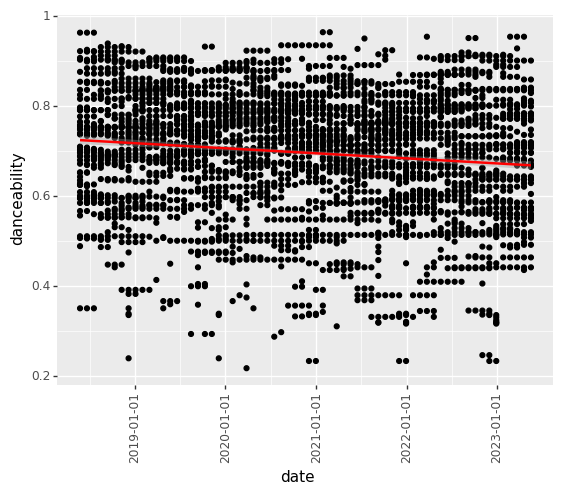

<ggplot: (315074885)>

In [109]:
# we will use the ggplot library to create the plots
# we will create one scatter plot for each audio feature

# concatenating the lists of dataframes for each audio feature
danceability_df = pd.concat(danceability_list)
# converting datatype of date column to datetime
danceability_df['date'] = pd.to_datetime(danceability_df['date'])

# creating a scatter plot with trend line based on the concatenated dataframe
danceability_p = p9.ggplot(p9.aes(x='date', y='danceability'), danceability_df) + p9.geom_point() + p9.theme(axis_text_x = p9.element_text(angle=90)) + p9.geom_smooth(color = 'red')
danceability_p


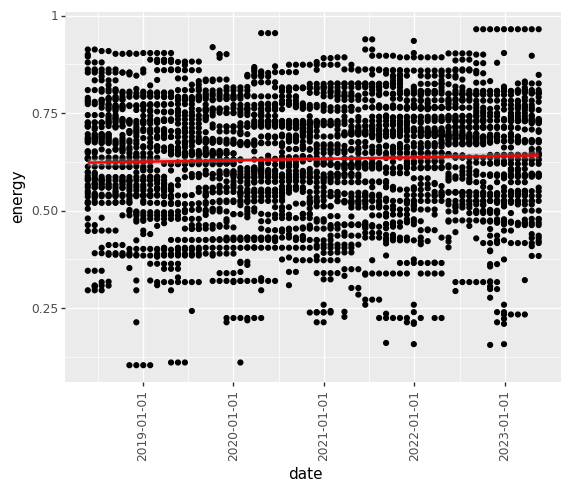

<ggplot: (318484456)>

In [110]:
energy_df = pd.concat(energy_list)
energy_df['date'] = pd.to_datetime(energy_df['date'])
energy_p = p9.ggplot(p9.aes(x='date', y='energy'), energy_df) + p9.geom_point() + p9.theme(axis_text_x = p9.element_text(angle=90)) + p9.geom_smooth(color = 'red')
energy_p

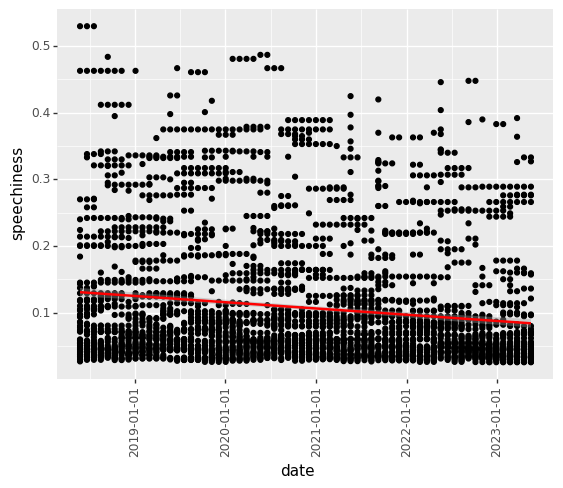

<ggplot: (319468049)>

In [111]:
speechiness_df = pd.concat(speechiness_list)
speechiness_df['date'] = pd.to_datetime(speechiness_df['date'])
speechiness_p = p9.ggplot(p9.aes(x='date', y='speechiness'), speechiness_df) + p9.geom_point() + p9.theme(axis_text_x = p9.element_text(angle=90)) + p9.geom_smooth(color = 'red')
speechiness_p

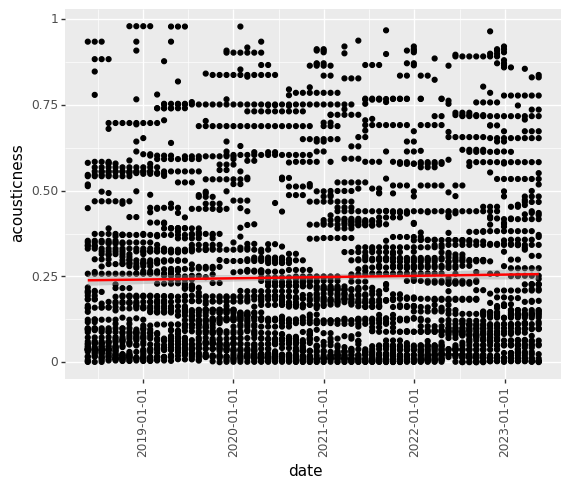

<ggplot: (318209973)>

In [112]:
acousticness_df = pd.concat(acousticness_list)
acousticness_df['date'] = pd.to_datetime(acousticness_df['date'])
acousticness_p = p9.ggplot(p9.aes(x='date', y='acousticness'), acousticness_df) + p9.geom_point() + p9.theme(axis_text_x = p9.element_text(angle=90)) + p9.geom_smooth(color = 'red')
acousticness_p

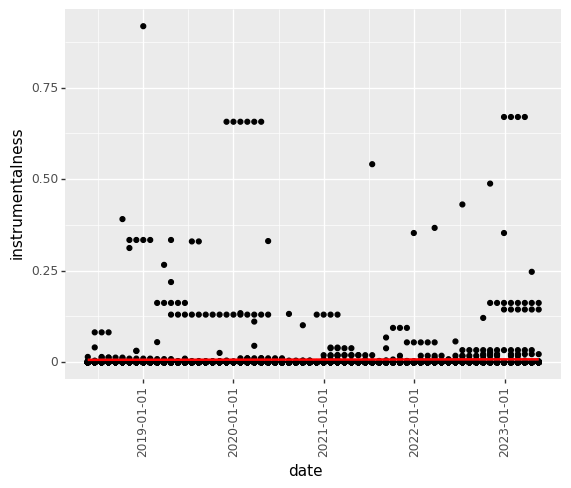

<ggplot: (319629240)>

In [113]:
instrumentalness_df = pd.concat(instrumentalness_list)
instrumentalness_df['date'] = pd.to_datetime(instrumentalness_df['date'])
instrumentalness_p = p9.ggplot(p9.aes(x='date', y='instrumentalness'), instrumentalness_df) + p9.geom_point() + p9.theme(axis_text_x = p9.element_text(angle=90)) + p9.geom_smooth(color = 'red')
instrumentalness_p

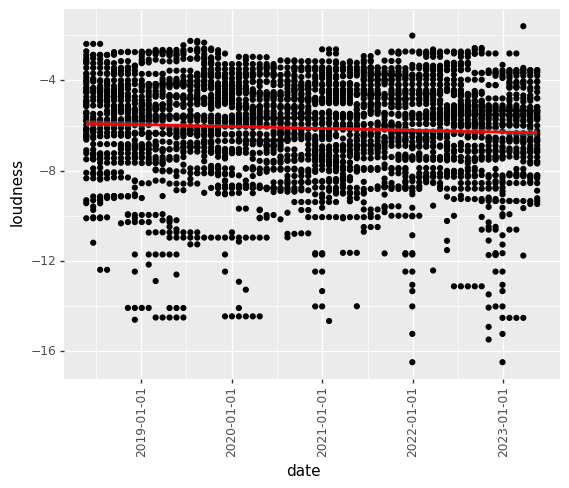

<ggplot: (319741928)>

In [114]:
loudness_df = pd.concat(loudness_list)
loudness_df['date'] = pd.to_datetime(loudness_df['date'])
loudness_p = p9.ggplot(p9.aes(x='date', y='loudness'), loudness_df) + p9.geom_point() + p9.theme(axis_text_x = p9.element_text(angle=90)) + p9.geom_smooth(color = 'red')
loudness_p

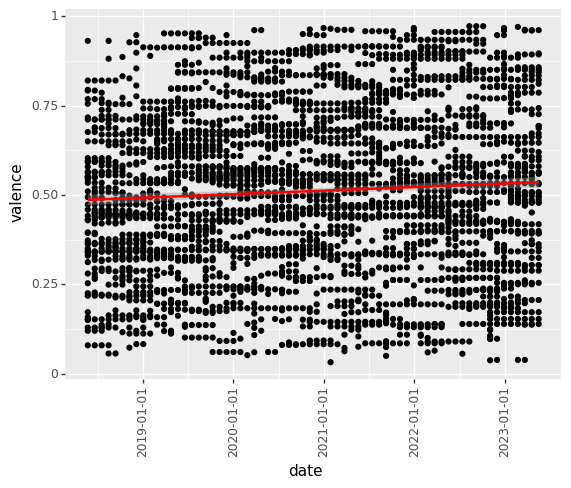

<ggplot: (319333482)>

In [115]:
valence_df = pd.concat(valence_list)
valence_df['date'] = pd.to_datetime(valence_df['date'])
valence_p = p9.ggplot(p9.aes(x='date', y='valence'), valence_df) + p9.geom_point() + p9.theme(axis_text_x = p9.element_text(angle=90)) + p9.geom_smooth(color = 'red')
valence_p

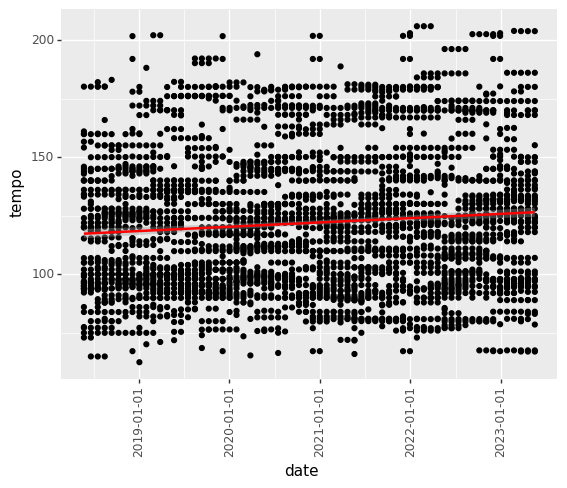

<ggplot: (319822095)>

In [116]:
tempo_df = pd.concat(tempo_list)
tempo_df['date'] = pd.to_datetime(tempo_df['date'])
tempo_p = p9.ggplot(p9.aes(x='date', y='tempo'), tempo_df) + p9.geom_point() + p9.theme(axis_text_x = p9.element_text(angle=90)) + p9.geom_smooth(color = 'red')
tempo_p

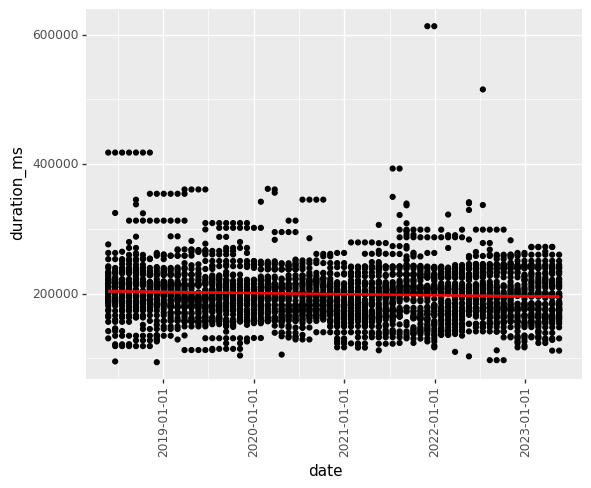

<ggplot: (319896234)>

In [117]:
duration_ms_df = pd.concat(duration_ms_list)
duration_ms_df['date'] = pd.to_datetime(duration_ms_df['date'])
duration_ms_p = p9.ggplot(p9.aes(x='date', y='duration_ms'), duration_ms_df) + p9.geom_point() + p9.theme(axis_text_x = p9.element_text(angle=90)) + p9.geom_smooth(color = 'red')
duration_ms_p